In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from random import shuffle
from tqdm import tqdm
import os

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [30]:
def extractImages(pathIn, pathOut):
    count = 0
    vidcap = cv.VideoCapture(pathIn)
    success,image = vidcap.read()
    success = True
    while tqdm(success):
      vidcap.set(cv.CAP_PROP_POS_MSEC,(count*1000))    # added this line 
      success,image = vidcap.read()         
      cv.imwrite( pathOut + "/frame%d.jpg" % count, image)     # save frame as JPEG file
      count = count + 1

In [31]:
w = 96
h = 96

In [32]:
def list_dir(path):
    fileNames = []
    for root, dirs, files in os.walk(path):  
        for filename in tqdm(files): 
            fileNames.append(filename)            
    return fileNames

In [33]:
files = list_dir('../videos')

100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 5984.74it/s]


In [34]:
print(files[0])

video-1.mp4


In [35]:
def extract(videoRoot, imageRoot):
    videos = list_dir(videoRoot)
    for video in tqdm(videos):
        videoPath = videoRoot + '/' + video
        videoName = video.split('.')[0]
        imagePath = imageRoot+'/' +videoName
        if not os.path.exists(imagePath):
            os.makedirs(imagePath)
            extractImages(videoPath,imagePath)        

In [36]:
extract('../videos', '../images')

100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 5987.59it/s]


In [10]:
labelsFile = '../labels/labels.csv'
def read_labels(lablesFile):
    labelData = []
    with open(lablesFile) as inf:
        for line in tqdm(inf):            
            video, frame, label, clazz = line.strip().split(",")
            frame = int(frame)
            label = int(label)
            labelData.append({'video':video, 'frame':frame, 'label':label, 'class':clazz})
    return labelData

labels = read_labels(labelsFile)
            

264it [00:00, 263641.97it/s]


In [11]:
def get_label(file, labels):    
    for l in labels:         
        if 'frame' + str(l['frame']) + '.jpg' == file:
            if l['class'] == 'Light':                
                return np.array([1,0])
            else:
                return np.array([0,1])
    return np.array([1,1])
    
def train_data_with_label(train_data, labels):
    train_images = []    
    for i in tqdm(os.listdir(train_data)):        
        path = os.path.join(train_data, i)        
        img = cv.imread(path, cv.IMREAD_GRAYSCALE)
        img = cv.resize(img, (w,h))     
        label = get_label(i, labels)      
        train_images.append([np.array(img),label])              
    #shuffle(train_images)
    return train_images

In [12]:
train_data = train_data_with_label('../images/video-1', labels)

100%|████████████████████████████████████████████████████████████████████████████████| 265/265 [00:04<00:00, 53.65it/s]


In [13]:
train_data[100]

[array([[ 95, 140,  98, ..., 120,  83,  68],
        [116, 125, 149, ...,  81,  76,  64],
        [123, 128, 150, ...,  75,  67,  75],
        ...,
        [ 87,  84,  88, ...,  42,  40,  43],
        [ 90,  92,  96, ...,  42,  40,  40],
        [ 94,  97, 104, ...,  42,  40,  40]], dtype=uint8), array([0, 1])]

In [14]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

Using TensorFlow backend.


In [15]:
test_data = train_data_with_label('../images/video-1', labels)

100%|███████████████████████████████████████████████████████████████████████████████| 265/265 [00:02<00:00, 100.84it/s]


In [16]:
tr_img_data = np.array([i[0] for i in train_data]).reshape(-1, w,h,1)
tr_lbl_data = np.array([i[1] for i in train_data])

tst_img_data = np.array([i[0] for i in test_data]).reshape(-1, w,h,1)
tst_lbl_data = np.array([i[1] for i in test_data])


In [17]:
for i in tr_lbl_data:
    print(i)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1

In [18]:
model = Sequential()

model.add(InputLayer(input_shape=[w,h,1]))
model.add(Conv2D(filters=32, kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2,activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=10)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
265/265 [==============================] - ETA: 3:25 - loss: 1.2476 - acc: 0.800 - ETA: 1:41 - loss: 0.6238 - acc: 0.900 - ETA: 1:06 - loss: 0.9532 - acc: 0.900 - ETA: 48s - loss: 0.7149 - acc: 0.925 - ETA: 37s - loss: 0.5719 - acc: 0.94 - ETA: 30s - loss: 0.4766 - acc: 0.95 - ETA: 25s - loss: 0.8690 - acc: 0.92 - ETA: 21s - loss: 0.9619 - acc: 0.92 - ETA: 18s - loss: 1.0341 - acc: 0.92 - ETA: 15s - loss: 0.9369 - acc: 0.93 - ETA: 13s - loss: 0.8518 - acc: 0.93 - ETA: 11s - loss: 0.7808 - acc: 0.94 - ETA: 10s - loss: 0.7207 - acc: 0.94 - ETA: 9s - loss: 0.6692 - acc: 0.9500 - ETA: 7s - loss: 0.7321 - acc: 0.946 - ETA: 6s - loss: 0.6863 - acc: 0.950 - ETA: 6s - loss: 0.7408 - acc: 0.947 - ETA: 5s - loss: 0.7892 - acc: 0.944 - ETA: 4s - loss: 1.0

265/265 [==============================] - ETA: 3s - loss: 1.6118 - acc: 0.900 - ETA: 3s - loss: 0.8059 - acc: 0.950 - ETA: 3s - loss: 0.5373 - acc: 0.966 - ETA: 3s - loss: 1.2089 - acc: 0.925 - ETA: 3s - loss: 0.9671 - acc: 0.940 - ETA: 3s - loss: 1.0745 - acc: 0.933 - ETA: 3s - loss: 1.1513 - acc: 0.928 - ETA: 3s - loss: 1.0074 - acc: 0.937 - ETA: 2s - loss: 0.8954 - acc: 0.944 - ETA: 2s - loss: 0.8059 - acc: 0.950 - ETA: 2s - loss: 0.7326 - acc: 0.954 - ETA: 2s - loss: 0.8059 - acc: 0.950 - ETA: 2s - loss: 0.7439 - acc: 0.953 - ETA: 2s - loss: 0.8059 - acc: 0.950 - ETA: 1s - loss: 0.9671 - acc: 0.940 - ETA: 1s - loss: 0.9066 - acc: 0.943 - ETA: 1s - loss: 0.8533 - acc: 0.947 - ETA: 1s - loss: 0.8059 - acc: 0.950 - ETA: 1s - loss: 0.8483 - acc: 0.947 - ETA: 1s - loss: 0.9671 - acc: 0.940 - ETA: 0s - loss: 0.9210 - acc: 0.942 - ETA: 0s - loss: 0.8792 - acc: 0.945 - ETA: 0s - loss: 0.8409 - acc: 0.947 - ETA: 0s - loss: 0.8059 - acc: 0.950 - ETA: 0s - loss: 0.8381 - acc: 0.948 - ETA: 0s

265/265 [==============================] - ETA: 3s - loss: 1.1921e-07 - acc: 1.000 - ETA: 4s - loss: 1.1921e-07 - acc: 1.000 - ETA: 4s - loss: 1.1921e-07 - acc: 1.000 - ETA: 4s - loss: 1.1921e-07 - acc: 1.000 - ETA: 3s - loss: 2.8505e-06 - acc: 1.000 - ETA: 3s - loss: 0.2686 - acc: 0.9833    - ETA: 3s - loss: 0.4605 - acc: 0.971 - ETA: 3s - loss: 0.4030 - acc: 0.975 - ETA: 3s - loss: 0.3582 - acc: 0.977 - ETA: 3s - loss: 0.4835 - acc: 0.970 - ETA: 2s - loss: 0.5861 - acc: 0.963 - ETA: 2s - loss: 0.8059 - acc: 0.950 - ETA: 2s - loss: 0.8679 - acc: 0.946 - ETA: 2s - loss: 0.9210 - acc: 0.942 - ETA: 2s - loss: 0.8596 - acc: 0.946 - ETA: 1s - loss: 0.8059 - acc: 0.950 - ETA: 1s - loss: 0.8533 - acc: 0.947 - ETA: 1s - loss: 0.8059 - acc: 0.950 - ETA: 1s - loss: 0.7635 - acc: 0.952 - ETA: 1s - loss: 0.8865 - acc: 0.945 - ETA: 1s - loss: 0.8443 - acc: 0.947 - ETA: 0s - loss: 0.8792 - acc: 0.945 - ETA: 0s - loss: 0.9110 - acc: 0.943 - ETA: 0s - loss: 0.8731 - acc: 0.945 - ETA: 0s - loss: 0.902

265/265 [==============================] - ETA: 4s - loss: 1.6118 - acc: 0.900 - ETA: 4s - loss: 0.8059 - acc: 0.950 - ETA: 4s - loss: 1.0745 - acc: 0.933 - ETA: 4s - loss: 1.2089 - acc: 0.925 - ETA: 3s - loss: 0.9671 - acc: 0.940 - ETA: 3s - loss: 0.8059 - acc: 0.950 - ETA: 3s - loss: 0.9210 - acc: 0.942 - ETA: 3s - loss: 0.8059 - acc: 0.950 - ETA: 3s - loss: 0.7164 - acc: 0.955 - ETA: 2s - loss: 0.6447 - acc: 0.960 - ETA: 2s - loss: 0.5861 - acc: 0.963 - ETA: 2s - loss: 0.6716 - acc: 0.958 - ETA: 2s - loss: 0.6199 - acc: 0.961 - ETA: 2s - loss: 0.5756 - acc: 0.964 - ETA: 2s - loss: 0.6447 - acc: 0.960 - ETA: 1s - loss: 0.8059 - acc: 0.950 - ETA: 1s - loss: 0.9481 - acc: 0.941 - ETA: 1s - loss: 0.8954 - acc: 0.944 - ETA: 1s - loss: 0.8483 - acc: 0.947 - ETA: 1s - loss: 0.8865 - acc: 0.945 - ETA: 0s - loss: 0.8443 - acc: 0.947 - ETA: 0s - loss: 0.8059 - acc: 0.950 - ETA: 0s - loss: 0.8409 - acc: 0.947 - ETA: 0s - loss: 0.8731 - acc: 0.945 - ETA: 0s - loss: 0.9026 - acc: 0.944 - ETA: 0s

In [19]:
    test_img = train_data[135][0]
    predict_data = test_img.reshape(-1,w,h,1)
    model_out = model.predict([predict_data])
    print(model_out)

[[0. 1.]]


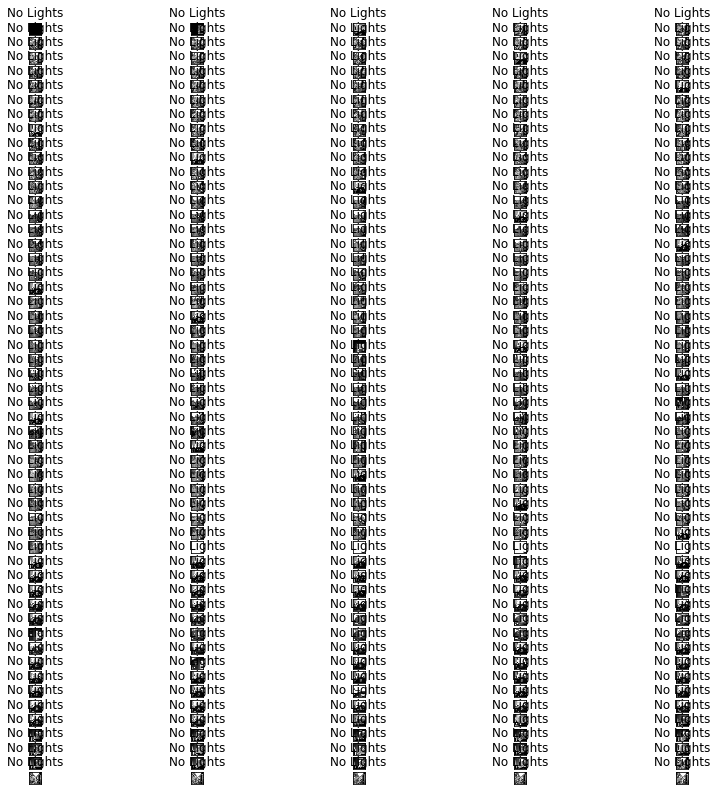

In [20]:
fig =plt.figure(figsize=(14,14))
plot_cols = 5
plot_rows = len(train_data)/plot_cols
for cnt, data in enumerate(train_data[:]):
    y = fig.add_subplot(plot_rows,plot_cols, cnt+1)
    img = data[0]
    data = img.reshape(1,w,h,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 1:
        str_label = 'No Lights'
    else:
        str_label = 'Lights'
        
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)    